In [ ]:
!pip install pandas

C:\Users\MBUSER\AppData\Local\Temp/ipykernel_11060/1387979060.py:71: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["yearOfRegistration"], color="g", ax=ax)


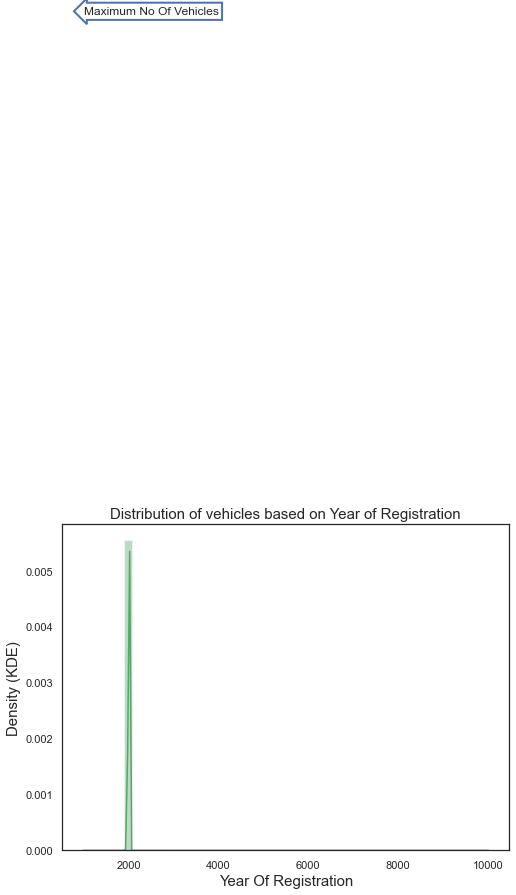

0

In [125]:
import os
import subprocess
import  stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
abs_path="C:/Users/MBUSER"
raw_data_path=abs_path+"/Downloads/autos.txt"
df=pd.read_csv(raw_data_path,encoding="latin-1")
df['vehicleType'].isnull().sum()
df['vehicleType'].fillna("Others",inplace=True)
df['seller'].isnull().sum()
df['offerType'].isnull().sum()
df['abtest'].isnull().sum()
df['yearOfRegistration'].isnull().values.sum()
df['gearbox'].isnull().value_counts()
df['gearbox'].fillna("Unspecified",inplace=True)
df['powerPS'].isnull().values.sum()
df['model'].isnull().values.sum()
df['model'].fillna("Unspecified",inplace=True)
df['fuelType'].isnull().values.sum()
df['fuelType'].fillna("Unspecified",inplace=True)
df['brand'].isnull().values.sum()
df['notRepairedDamage'].isnull().values.sum()
df['notRepairedDamage'].fillna("Unspecified",inplace=True)
df['postalCode'].isnull().values.sum()
df['offerType'].unique()
df['offerType']=df['offerType'].map({'Angebot':'Request','Gesuch':'Offer'})
df['fuelType'].unique()
#df['fuelType']=df['fuelType'].map({'benzin':'Gasoline'})
del df['nrOfPictures']
df['yearCreated']=df['dateCreated'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))
df['monthCreated']=df['dateCreated'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))
df['yearCrawled']=df['dateCrawled'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))
df['monthCrawled']=df['dateCrawled'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))
from_date=df['dateCreated'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
to_date=df['lastSeen'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
no_days=abs((to_date-from_date))
no_days=(no_days/np.timedelta64(1,'D').astype(int))
df['NoOfDaysOnline']=no_days
from_hours=df['dateCreated'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
to_hours=df['dateCreated'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").time().strftime('%H'))
no_hours=(from_hours.astype(int)-to_hours.astype(int))
df['NoOfHoursOnline']=no_hours

#to_yearsOld=df['lastSeen'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))
#years_old=abs((to_yearsOld-df['yearOfRegistration']))
#df['yearsOld']=years_old

df['yearsOld']=2016-df['yearOfRegistration']
df['monthsOld']=12-df['monthOfRegistration']
df['monthOfRegistration'].replace([0,12],[1,11],inplace=True)
months=['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
df['monthOfRegistration'].replace([1,2,3,4,5,6,7,8,9,10,11,12],months,inplace=True)
#df['monthOfRegistration'].replace([1,11],months,inplace=True)
#df['monthOfRegistration'].replace([0,1,2,3,4,5,6,7,8,9,10,11],months,inplace=True)

df['fuelType'].unique()
df['fuelType']=df['fuelType'].map({'benzin':'Gasoline','diesel':'Diesel','Unspecified':'Other','lpg':'LPG','hybrid':'Hybrid','cng':'CNG','elektro':'Electric'})
df['notRepairedDamage'].unique()
#df["fuelType"] = df["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','other':'Other','lpg':'Lpg','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})
df['notRepairedDamage']=df['notRepairedDamage'].map({'ja':'Yes','nein':'No','Unspecified':'Others'})
#df['model'].unique()
#df['model']=df['model'].map({})

# In[13]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df["yearOfRegistration"], color="g", ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
bbox_props = dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2)
ax.text(2500,0.015,"Maximum No Of Vehicles",ha="center", va="center", rotation=0,size=12,bbox=bbox_props)

plt.show()


# In[13]:

fig.savefig(abs_path + "/DataPreparation/Plots/vehicle-distribution.png")

df = df[(df["yearOfRegistration"] >= 1890) & (df["yearOfRegistration"] <= 2016)]

#fig.savefig(abs_path + "/Downloads/vehicle-distribution.png")

median_=df.groupby('vehicleType')['price'].median()
quar75_=df.groupby('vehicleType')['price'].quantile(0.75)
quar25_=df.groupby('vehicleType')['price'].quantile(0.25)
#pricesunique?
iqr=(quar75_-quar25_)*1.5+median_
iqr

df=df[((df['vehicleType']=='andere')&(df['price']<=8429)) |
     ((df['vehicleType']=='Other')&(df['price']<=3708)) |
     ((df['vehicleType']=='suv')&(df['price']<=28800)) |
     ((df['vehicleType']=='kombi')&(df['price']<=13076)) |
      ((df['vehicleType']=='bus')&(df['price']<=13948)) |
      ((df['vehicleType']=='cabrio')&(df['price']<=21400)) |
      ((df['vehicleType']=='limousine')&(df['price']<=12801)) |
      ((df['vehicleType']=='coupe')&(df['price']<=24300)) |
      ((df['vehicleType']=='kleinwagen')&(df['price']<=5775))]


# In[303]:

# saving the data file as csv to current directory location
path_to_file  = abs_path + "/CleanData/CleanedDataSet/cleaned_autoss.csv"
df.to_csv(path_to_file,index=False)


# In[304]:

# splitting the the records based on brand and vehicleType
fileName = abs_path + "/ShellScripts/CreateFiles.sh"
file = open(fileName, "w+")
baseString_before = '''awk 'BEGIN{FS=OFS=","} FNR == 1 {print} '''
baseString_after = " {print}' " + abs_path + "/CleanData/CleanedDataSet/cleaned_autoss.csv" + " >> " + abs_path + "/CleanData/DataForAnalysis/"
for b in list(df["brand"].unique()):
    for typ in list(df[df["brand"] == b]["vehicleType"].unique()):
        newString = baseString_before + '$15 == ' + '"' + b + '"' + ' && $7 == ' + '"' + typ + '"' + baseString_after + b + "/" + b + "_" + typ + ".csv" + "\n"
        file.write(newString)
file.close()
st = os.stat(fileName)
os.chmod(fileName, st.st_mode | stat.S_IEXEC)
subprocess.call(fileName,shell=True)



#abs_path

C:\Users\MBUSER\AppData\Local\Temp/ipykernel_11548/1675627666.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yearOfRegistration'],kde=True,color='#33cc33',ax=ax)


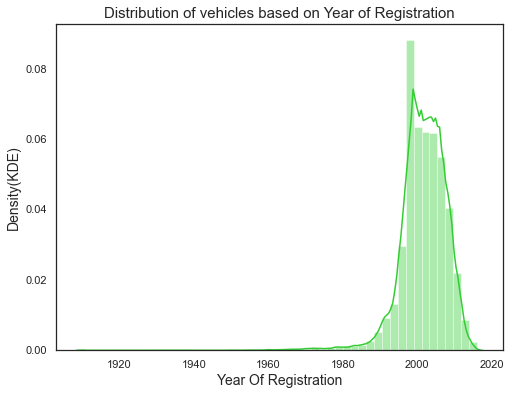

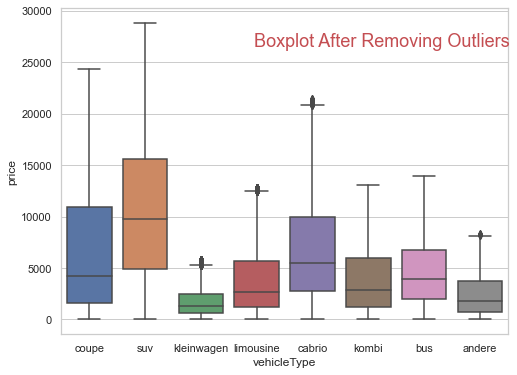

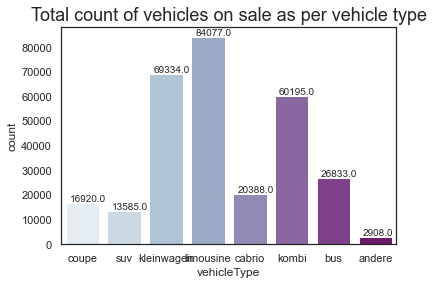

In [1]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

abs_path="C:/Users/MBUSER"
#raw_data_path=abs_path+"/Downloads/autos.txt"
#abs_path = os.getcwd()
#path_array = abs_path.split("/")
#path_array = path_array[:len(path_array)-1]
#homefolder_path = ""
#for i in path_array[1:]:
#    homefolder_path = homefolder_path + "/" + i   

clean_data_path = abs_path + "/CleanData/CleanedDataSet/cleaned_autoss.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(df['yearOfRegistration'],kde=True,color='#33cc33',ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density(KDE)", fontsize = 14)
plt.xlabel('Year Of Registration',fontsize=14)
plt.show()
fig.savefig(abs_path+"/Analysis1/Plots/vehicle-distributionn.png")

sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='vehicleType',y='price',data=df)
ax.text(5.25,27000,'Boxplot After Removing Outliers',fontsize=18,color='r',ha='center',va='center')
plt.show()
fig.savefig(abs_path + "/Analysis1/Plots/price-vehicleType-boxplott.png")

sns.set_style("white")
#g = sns.factorplot(x="vehicleType", data=df, kind="count",
                  # palette="BuPu", size=6, aspect=1.5)
g=sns.countplot(x='vehicleType', data=df, palette="BuPu")
g.set_title("Total count of vehicles on sale as per vehicle type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))



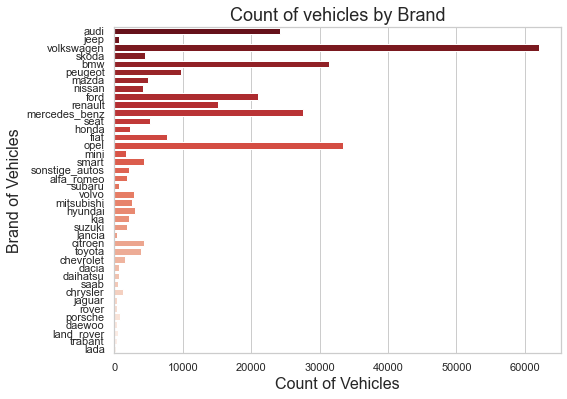

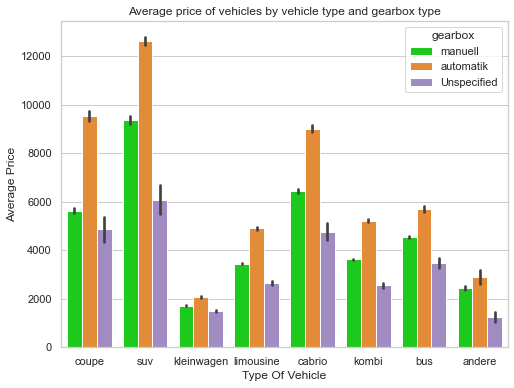

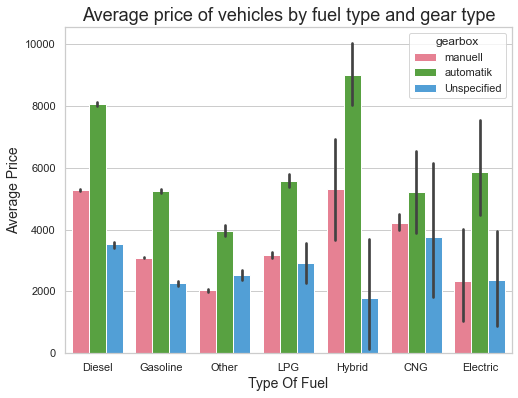

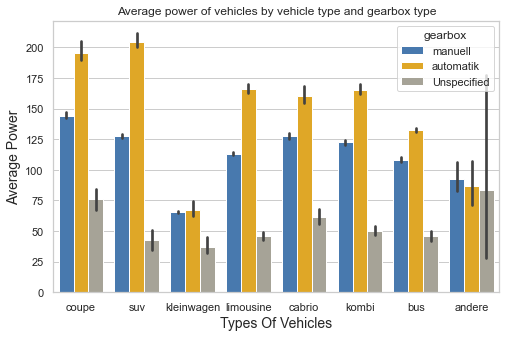

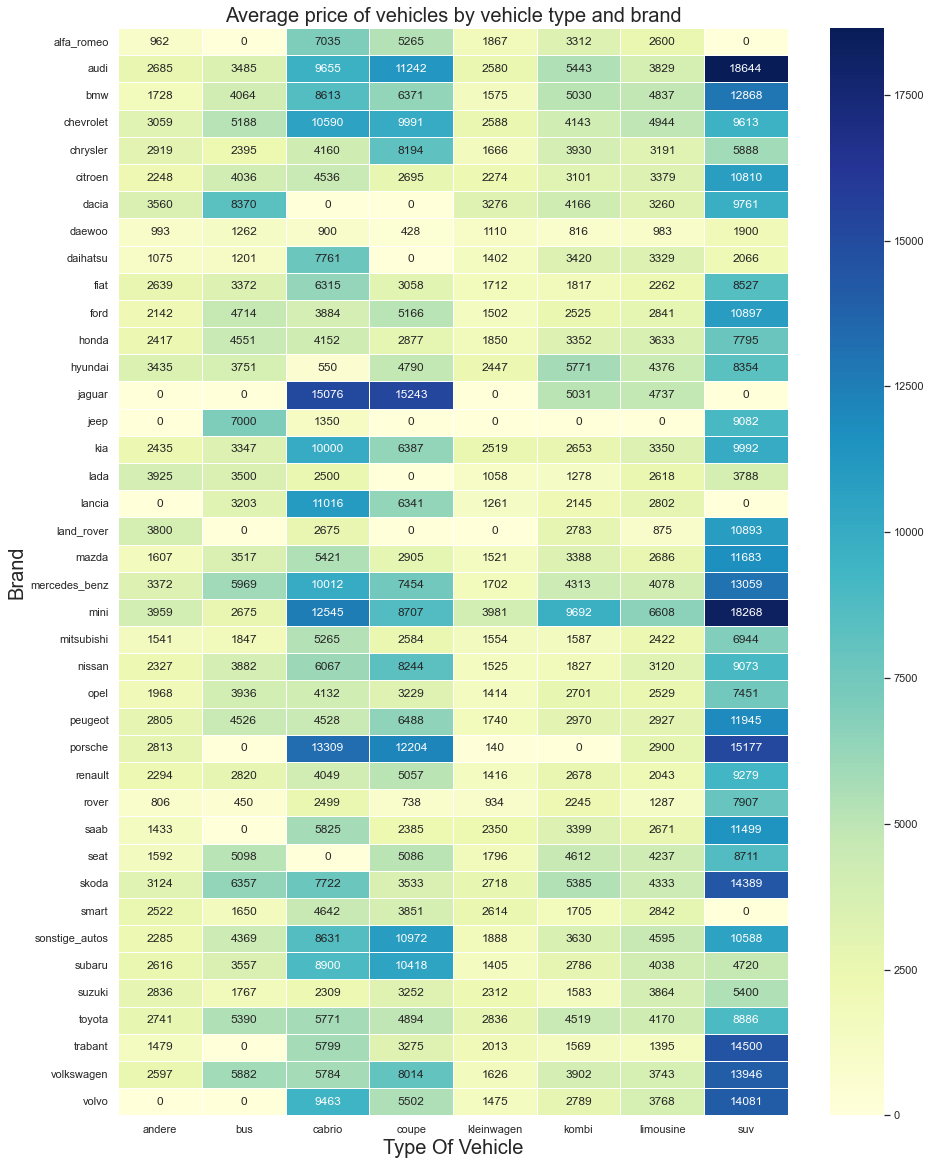

In [2]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style='white')

import warnings
warnings.filterwarnings('ignore')

abs_path="C:/Users/MBUSER"
clean_data_path = abs_path + "/CleanData/CleanedDataSet/cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

sns.set_style("whitegrid")
#fig,ax=plt.subplots(figsize=(8,6))
fig,ax=plt.subplots(figsize=(8,6))
g = sns.countplot(y="brand", data=df,palette="Reds_r")
g.set_title("Count of vehicles by Brand",fontdict={'size':18})
g.xaxis.set_label_text("Count of Vehicles",fontdict= {'size':16})
g.yaxis.set_label_text("Brand of Vehicles",fontdict= {'size':16})
plt.show()

fig.savefig(abs_path+"/Analysis2/Plots/brand-vehicleCountt.png")
#fig = g.figure

fig,ax=plt.subplots(figsize=(8,6))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x='vehicleType',y='price',hue='gearbox',palette=colors,data=df)
ax.set_title("Average price of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()
fig.savefig((abs_path + "/Analysis2/Plots/vehicletype-gearbox-pricee.png"))

fig,ax=plt.subplots(figsize=(8,6))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x='fuelType',y='price',hue='gearbox',palette='husl',data=df)
ax.set_title('Average price of vehicles by fuel type and gear type',fontdict={'size':18})
ax.xaxis.set_label_text('Type Of Fuel',fontdict={'size':14})
ax.yaxis.set_label_text('Average Price',fontdict={'size':14})
plt.show()
fig.savefig((abs_path + "/Analysis3/Plots/fueltype-vehicleType-pricee.png"))

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x='vehicleType',y='powerPS',hue='gearbox',data=df)
ax.set_title("Average power of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Types Of Vehicles",fontdict={'size':14})
ax.yaxis.set_label_text("Average Power",fontdict={'size':14})
plt.show()
fig.savefig((abs_path + "/Analysis3/Plots/vehicletype-fueltype-powerr.png"))

trial=pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df['vehicleType'].unique()):
        z=df[(df['brand']==b) & (df['vehicleType']==v)]['price'].mean()
        trial=trial.append(pd.DataFrame({'brand':b,'vehicleType':v,'avgPrice':z},index=[0]))
trial=trial.reset_index()
del trial['index']
trial['avgPrice'].fillna(0,inplace=True)
trial['avgPrice'].isnull().value_counts()
trial['avgPrice']=trial['avgPrice'].astype(int)
trial.head(5)

tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()
fig.savefig((abs_path + "/Analysis4/Plots/heatmap-price-brand-vehicleTypee.png"))


#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#fig, ax = plt.subplots(figsize=(8,5))
#sns.set_palette(sns.xkcd_palette(colors))
#sns.stripplot(x="vehicleType", y="NoOfDaysOnline", hue="gearbox", split=True, data=frame,size=8, alpha=0.5, jitter=True)
#ax.set_title("No of days a add is online before the vehicles of brand " + " is sold")
#ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
#ax.yaxis.set_label_text("No of days online",fontdict= {'size':14})
#plt.show()

